# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [4]:
pip install citipy

Note: you may need to restart the kernel to use updated packages.


In [5]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from datetime import datetime
from scipy.stats import linregress
import scipy.stats as st

# Import API key
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [7]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

639

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [9]:
# Url and units
url = "http://api.openweathermap.org/data/2.5/weather?"
units = "imperial"

# Build query URL
query_url = f"{url}appid={weather_api_key}&units={units}&q="

In [10]:
# List for holding reponse information
lat = []
temp = []
temp_max = []
humidity = []
wind_speed = []
lon = []
date = []
country = []
cloudiness = []


# Loop through the list of cities and request for data on each
print("Beginning Data Retrieval")
print("--------------------------------------------")
count = 0
set = 1
for idx, city in enumerate(cities):
    count = count + 1
    # To avoid api call rate limits, get city weather data for 50 cities,
    # then sleep for 5 seconds, and then continue with next 50 cities and so on...
    if count == 51:
        count = 1
        set = set + 1
        time.sleep(5)
    print(f"Processing Record {count} of Set {set} | {city}")
    try:
        response = requests.get(query_url + city).json()
        lat.append(response['coord']['lat'])
        lon.append(response['coord']['lon'])
        temp.append(response['main']['temp'])
        temp_max.append(response['main']['temp_max'])
        humidity.append(response['main']['humidity'])
        wind_speed.append(response['wind']['speed'])
        date.append(response['dt'])
        country.append(response['sys']['country'])
        cloudiness.append(response['clouds']['all'])
    except KeyError:
        print("City not found. Skipping...")
        lat.append(np.nan)
        lon.append(np.nan)
        temp.append(np.nan)
        temp_max.append(np.nan)
        humidity.append(np.nan)
        wind_speed.append(np.nan)
        date.append(np.nan)
        country.append(np.nan)
        cloudiness.append(np.nan)
print("------------------------------------------------")
print("Data Retrieval Complete")
print("------------------------------------------------")

Beginning Data Retrieval
--------------------------------------------
Processing Record 1 of Set 1 | belushya guba
City not found. Skipping...
Processing Record 2 of Set 1 | busselton
Processing Record 3 of Set 1 | rikitea
Processing Record 4 of Set 1 | yellowknife
Processing Record 5 of Set 1 | cape town
Processing Record 6 of Set 1 | hasaki
Processing Record 7 of Set 1 | hithadhoo
Processing Record 8 of Set 1 | jamestown
Processing Record 9 of Set 1 | puerto ayora
Processing Record 10 of Set 1 | ponta do sol
Processing Record 11 of Set 1 | tuktoyaktuk
Processing Record 12 of Set 1 | arraial do cabo
Processing Record 13 of Set 1 | tuatapere
Processing Record 14 of Set 1 | keuruu
Processing Record 15 of Set 1 | karakol
Processing Record 16 of Set 1 | butaritari
Processing Record 17 of Set 1 | kavieng
Processing Record 18 of Set 1 | san patricio
Processing Record 19 of Set 1 | ushuaia
Processing Record 20 of Set 1 | rio gallegos
Processing Record 21 of Set 1 | yulara
Processing Record 2

Processing Record 40 of Set 4 | san buenaventura
Processing Record 41 of Set 4 | curvelo
Processing Record 42 of Set 4 | santa cruz
Processing Record 43 of Set 4 | chernoyerkovskaya
Processing Record 44 of Set 4 | kainantu
Processing Record 45 of Set 4 | esso
Processing Record 46 of Set 4 | le port
Processing Record 47 of Set 4 | ostrovnoy
Processing Record 48 of Set 4 | hammerfest
Processing Record 49 of Set 4 | sayyan
Processing Record 50 of Set 4 | tiksi
Processing Record 1 of Set 5 | kikwit
Processing Record 2 of Set 5 | kodinsk
Processing Record 3 of Set 5 | acapulco
Processing Record 4 of Set 5 | san carlos
Processing Record 5 of Set 5 | vredendal
Processing Record 6 of Set 5 | tual
Processing Record 7 of Set 5 | quatre cocos
Processing Record 8 of Set 5 | dubbo
Processing Record 9 of Set 5 | meyungs
City not found. Skipping...
Processing Record 10 of Set 5 | xadani
City not found. Skipping...
Processing Record 11 of Set 5 | masunga
Processing Record 12 of Set 5 | burkhala
City n

Processing Record 28 of Set 8 | ariquemes
Processing Record 29 of Set 8 | labuhan
Processing Record 30 of Set 8 | baghdad
Processing Record 31 of Set 8 | imbituba
Processing Record 32 of Set 8 | agadez
Processing Record 33 of Set 8 | sidmouth
Processing Record 34 of Set 8 | ruatoria
City not found. Skipping...
Processing Record 35 of Set 8 | batagay-alyta
Processing Record 36 of Set 8 | zilair
Processing Record 37 of Set 8 | forrest city
Processing Record 38 of Set 8 | akdagmadeni
Processing Record 39 of Set 8 | baindur
Processing Record 40 of Set 8 | kedrovyy
Processing Record 41 of Set 8 | hay river
Processing Record 42 of Set 8 | soyo
Processing Record 43 of Set 8 | havre-saint-pierre
Processing Record 44 of Set 8 | peace river
Processing Record 45 of Set 8 | taiyuan
Processing Record 46 of Set 8 | heishan
Processing Record 47 of Set 8 | provideniya
Processing Record 48 of Set 8 | mount isa
Processing Record 49 of Set 8 | nikolskoye
Processing Record 50 of Set 8 | varhaug
Processing

Processing Record 19 of Set 12 | rozhyshche
Processing Record 20 of Set 12 | kollumerland
City not found. Skipping...
Processing Record 21 of Set 12 | hollins
Processing Record 22 of Set 12 | kurilsk
Processing Record 23 of Set 12 | hun
Processing Record 24 of Set 12 | ometepec
Processing Record 25 of Set 12 | warqla
City not found. Skipping...
Processing Record 26 of Set 12 | aras
Processing Record 27 of Set 12 | krasnyy luch
Processing Record 28 of Set 12 | khudumelapye
Processing Record 29 of Set 12 | araouane
Processing Record 30 of Set 12 | oistins
Processing Record 31 of Set 12 | dingle
Processing Record 32 of Set 12 | mangrol
Processing Record 33 of Set 12 | energetik
Processing Record 34 of Set 12 | douglas
Processing Record 35 of Set 12 | muros
Processing Record 36 of Set 12 | hearst
Processing Record 37 of Set 12 | oga
Processing Record 38 of Set 12 | akdepe
Processing Record 39 of Set 12 | kolosovka
Processing Record 40 of Set 12 | baykit
Processing Record 41 of Set 12 | man

In [11]:
# Length of Latitude and Temprature

len(lat)
len(temp)

639

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [17]:
# Convert raw data to dataframe.
city_weather_df = pd.DataFrame({
    "City": cities,
    "Lat": lat,
    "lng": lon,
    "Max Temp": temp_max,
    "Humidity": humidity,
    "Cloudiness": cloudiness,
    "Wind Speed": wind_speed,
    "Country": country,
    "Date": date,
})

# Drop any cities that were skipped because they could not be found using the OpenWeatherMap API.
city_weather_df = city_weather_df.dropna(how="any")
print(city_weather_df.count())

City          589
Lat           589
lng           589
Max Temp      589
Humidity      589
Cloudiness    589
Wind Speed    589
Country       589
Date          589
dtype: int64


In [19]:


city_weather_df.head()

,City,Lat,lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
1,busselton,-33.6500,115.3333,56.07,68.0,100.0,8.77,AU,1.665319e+09
2,rikitea,-23.1203,-134.9692,71.31,66.0,10.0,17.13,PF,1.665319e+09
3,yellowknife,62.4560,-114.3525,41.56,100.0,0.0,8.05,CA,1.665319e+09
4,cape town,-33.9258,18.4232,78.12,53.0,0.0,25.32,ZA,1.665319e+09
5,hasaki,35.7333,140.8333,63.00,83.0,100.0,3.76,JP,1.665320e+09


In [34]:
# Export the city data into a .csv file.
city_weather_df.to_csv("city_weather_data.csv", index=False)

## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

In [35]:
#  Get the indices of cities that have humidity over 100%.
humidity_df = weather_df.loc[weather_df['Humidity'] <= 100]
humidity_df


NameError: name 'weather_df' is not defined

In [ ]:
# Make a new DataFrame equal to the city data to drop all humidity outliers by index.
# Passing "inplace=False" will make a copy of the city_data DataFrame, which we call "clean_city_data".


In [24]:
humidity_df.describe()


NameError: name 'humidity_df' is not defined

## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

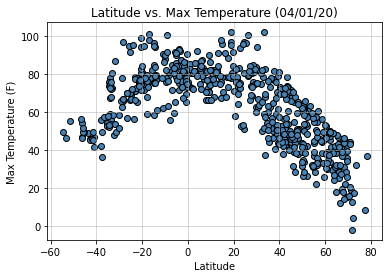

In [44]:
date_of_analysis = datetime.date(datetime.now())
# Create a scatter plot for latitude vs max temperature.
x_values = city_weather_df['Lat']
y_values = city_weather_df['Max Temp']
plt.scatter(x_values, y_values, facecolor = "steelblue", edgecolor = "black")
plt.xlabel('Latitude')
plt.ylabel('Max Temperature (F)')
plt.title(f"Latitude vs. Max Temperature (04/01/20)")
plt.grid(linestyle='-', linewidth=1, alpha = 0.5)
plt.savefig("../Images/latitude_vs_temperature.png", bbox_inches="tight")
plt.show()

The above scatter plot showcase the relationship between Latitude at x-axis vs Max Temperature (F) at the y-axis. This result indicates that there is a higher temrature for the cities that found near to the equater (Latitude 0),however when you go farther from the equator towrads to the north and soutt the temprature will decrease.

## Latitude vs. Humidity Plot

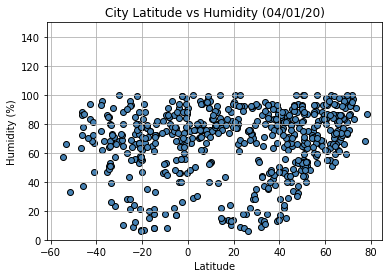

In [49]:
# Create a scatter plot for latitude vs humidity.
x_values = city_weather_df['Lat']
y_values = city_weather_df['Humidity']
plt.scatter(x_values, y_values, facecolor = "steelblue", edgecolor = "black")
plt.xlabel('Latitude')
plt.ylabel('Humidity (%)')
plt.title(f'City Latitude vs Humidity (04/01/20)')
plt.ylim(0, 150)
plt.grid()
plt.savefig("../Images/latitude_vs_humidity.png", bbox_inches="tight")
plt.show()

The above scatter plot displayed the relationship between Humidity (%) vs. Latitude.From the result we can infer that humidity is fairly distributed troughout the plot, so we can say that high humidity occer for both cities found farther or near to the equator.


## Latitude vs. Cloudiness Plot

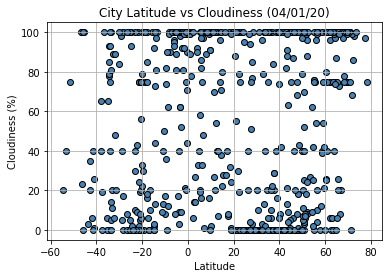

In [50]:
# Create a scatter plot for latitude vs cloudiness.
x_values = city_weather_df['Lat']
y_values = city_weather_df['Cloudiness']
plt.scatter(x_values, y_values, facecolor = "steelblue", edgecolor = "black")
plt.xlabel('Latitude')
plt.ylabel('Cloudiness (%)')
plt.title(f'City Latitude vs Cloudiness (04/01/20)')
plt.grid()
plt.savefig("../Images/latitude_vs_cloudiness.png", bbox_inches="tight")
plt.show()

The above scatter plot showed the relationship between the cities cloudness, and latitude. From this result we can tell that the data is evenly distributed, and there is no difference in Cloudiness when the cities farther or nearer to the equater(Latitude 0).

## Latitude vs. Wind Speed Plot

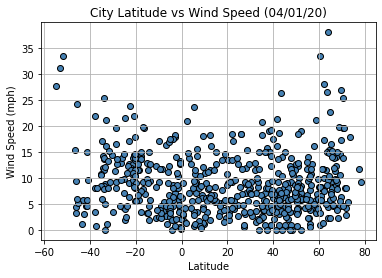

In [48]:
# Create a scatter plot for latitude vs wind speed.
x_values = city_weather_df['Lat']
y_values = city_weather_df['Wind Speed']
plt.scatter(x_values, y_values,facecolor = "steelblue", edgecolor = "black")
plt.xlabel('Latitude')
plt.ylabel('Wind Speed (mph)')
plt.title(f'City Latitude vs Wind Speed (04/01/20)')
plt.grid()
plt.savefig("../Images/latitude_vs_wind_speed.png", bbox_inches="tight")
plt.show()

The above scatter plot showed the relationship between wind speed (mph), and latitude. The plot displayed the lower wind speed when the cities closer to the equater (latitude 0) and somehow the wind speed increase for the cities farther from the equater.

## Linear Regression

In [51]:
# Create a function to create linear regression plots.
def createLinearRegressionPlot(x_values, y_values, x_label, y_label, hemisphere, line_placement, ylim=None):
    (slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)

    # Get regression values
    regress_values = x_values * slope + intercept
    
    # Create line equation string
    line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))
    
    plt.scatter(x_values, y_values)
    plt.xlabel(x_label)
    plt.ylabel(y_label)
    if ylim is not None:
        plt.ylim(0, ylim)
    today = datetime.date(datetime.now())
    plt.title(f"{hemisphere} Hemisphere - {x_label} vs {y_label} {today}")
    plt.annotate(line_eq,line_placement,fontsize=15,color="red")
    # Print r square value
    print(f"The r-squared is: {rvalue**2}")
    correlation = st.pearsonr(x_values,y_values)
    print(f"The correlation between both factors is {round(correlation[0],2)}")
    plt.savefig(f"../Images/{hemisphere}_{x_label}_vs_{y_label}.png", bbox_inches="tight")
    return plt.plot(x_values,regress_values,"r-")

In [54]:
# Create Northern and Southern Hemisphere DataFrames
northern_hemisphere_weather_df = city_weather_df.loc[city_weather_df["Lat"] >= 0]
southern_hemisphere_weather_df = city_weather_df.loc[city_weather_df["Lat"] < 0]

####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-squared is: 0.6725299933094252
The correlation between both factors is -0.82


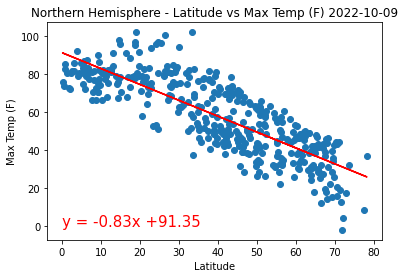

In [55]:
# Create a scatter plot for latitude vs max temp (northern hemisphere)
x_values = northern_hemisphere_weather_df['Lat']
y_values = northern_hemisphere_weather_df['Max Temp']
createLinearRegressionPlot(x_values, y_values, "Latitude", "Max Temp (F)", "Northern",(0, 0))

The above plot is a linear regression model between Maximum tempreture and latitude for Northern Hemisphere cities. The result from the data showed that there is a strong, negative correlation between Maximum tempreture and latitude. These means when we go farther away from the equater(latitude 0) the maximum Temperature (F) will decrease.
Southern Hemisphere - Max Temp vs. Latitude Linear Regression

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-squared is: 0.449135880916113
The correlation between both factors is 0.67


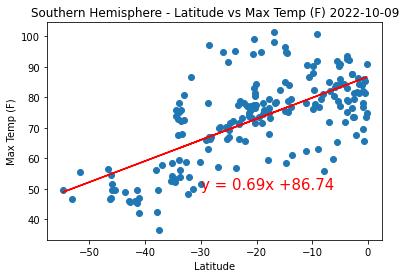

In [56]:
# Create a scatter plot for latitude vs max temp (southern hemisphere)
x_values = southern_hemisphere_weather_df['Lat']
y_values = southern_hemisphere_weather_df['Max Temp']
createLinearRegressionPlot(x_values, y_values, "Latitude", "Max Temp (F)", "Southern",(-30, 50))

The above plot is a linear regression model between Maximum tempreture and latitude for Southern Hemisphere cities. The result from the data showed that there is a very week almost none negative correlation between Maximum Tempreture and latitude in the Southern Hemisphere cities.

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-squared is: 0.02408611414969549
The correlation between both factors is 0.16


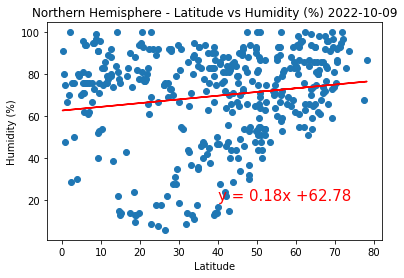

In [57]:
# Create a scatter plot for latitude vs humditiy (northern hemisphere)
x_values = northern_hemisphere_weather_df['Lat']
y_values = northern_hemisphere_weather_df['Humidity']
createLinearRegressionPlot(x_values, y_values, "Latitude", "Humidity (%)", "Northern",(40, 20))

The above plot is a linear regression model between Humidity (%) and Latitude for Northern Hemisphere cities. The result from the data showed that there is a very week negative correlation between Humidity (%) and Latitude in the Northern Hemisphere cities.

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-squared is: 0.02408611414969549
The correlation between both factors is 0.16


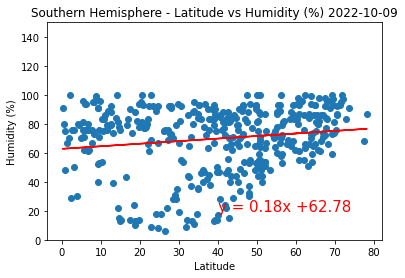

In [59]:
# Create a scatter plot for latitude vs humditiy (southern hemisphere)
x_values1 = southern_hemisphere_weather_df['Lat']
y_values1 = southern_hemisphere_weather_df['Humidity']
createLinearRegressionPlot(x_values, y_values, "Latitude", "Humidity (%)", "Southern",(40, 20), 150)

The above plot is a linear regression model between Humidity (%) and Latitude for Southern Hemisphere cities. The result from the data showed that there is a very week, almost none negative correlation between Humidity (%) and Latitude in the Southern Hemisphere cities.

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-squared is: 0.00612228975569138
The correlation between both factors is 0.08


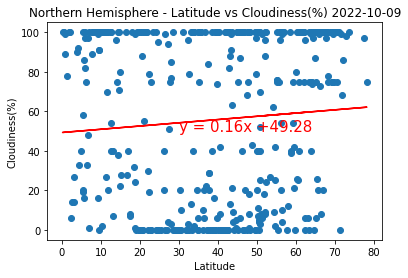

In [60]:
# Create a scatter plot for latitude vs cloudiness (northern hemisphere)
x_values = northern_hemisphere_weather_df['Lat']
y_values = northern_hemisphere_weather_df['Cloudiness']
createLinearRegressionPlot(x_values, y_values, "Latitude", "Cloudiness(%)", "Northern",(30, 50))

The above plot is a linear regression model between Cloudiness (%) and Latitude for Northern_Hemisphere cities. The result from the data showed that there is a very week, almost none negative correlation between Cloudiness (%) and Latitude in the Southern Hemisphere cities.

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-squared is: 0.06172219401528229
The correlation between both factors is 0.25


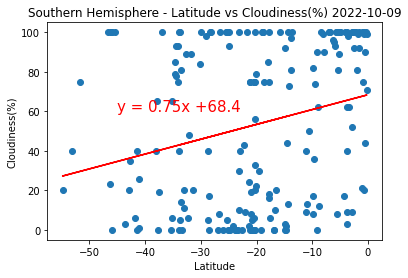

In [61]:
# Create a scatter plot for latitude vs cloudiness (southern hemisphere)
x_values = southern_hemisphere_weather_df['Lat']
y_values = southern_hemisphere_weather_df['Cloudiness']
createLinearRegressionPlot(x_values, y_values, "Latitude", "Cloudiness(%)", "Southern",(-45, 60))

The above plot is a linear regression model between Cloudiness (%) and for Southern Hemisphere cities. The result from the data showed that there is a very week, almost none negative correlation between Cloudiness (%) and Latitude in the Southern Hemisphere cities.

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-squared is: 0.02389854467439291
The correlation between both factors is 0.15


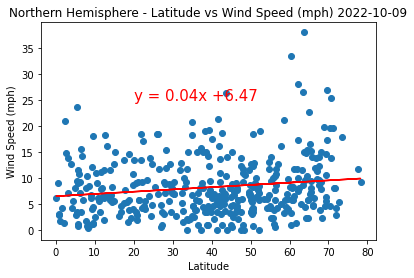

In [62]:
# Create a scatter plot for latitude vs wind speed(northern hemisphere)
x_values = northern_hemisphere_weather_df['Lat']
y_values = northern_hemisphere_weather_df['Wind Speed']
createLinearRegressionPlot(x_values, y_values, "Latitude", "Wind Speed (mph)", "Northern",(20, 25))

The above plot is a linear regression model between Wind Speed (mph), and latitude for Northern_Hemisphere cities. The result from the data showed that there is a very week, posetive correlation between Wind Speed (mph (%) and Latitude in the Northern Hemisphere cities.

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-squared is: 0.0843074582643741
The correlation between both factors is -0.29


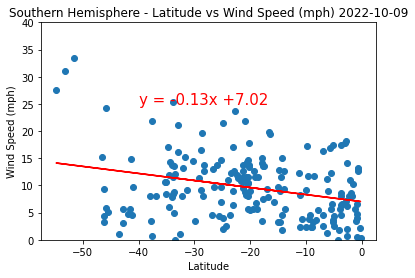

In [63]:
# Create a scatter plot for latitude vs wind speed (southern hemisphere)
x_values = southern_hemisphere_weather_df['Lat']
y_values = southern_hemisphere_weather_df['Wind Speed']
createLinearRegressionPlot(x_values, y_values, "Latitude", "Wind Speed (mph)", "Southern",(-40, 25), ylim=40)

The above plot is a linear regression model between Wind Speed (mph), and latitude for Southern Hemisphere. The result from the data showed that there is a very week, negative correlation between Wind Speed (mph (%) and Latitude in the Northern Hemisphere cities.